In [2]:
import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver
import math

# Problem 1
The equation is
$\ddot{x}+2\gamma\dot{x}+\omega_0^2 x=0$, 
with initial conditions $x(0)=0,\ \dot{x}(0)=\sqrt{0.96},\ \omega_0=1$,

$\gamma=$ (a) 0.2, (b) 1.0, (c) 1.2

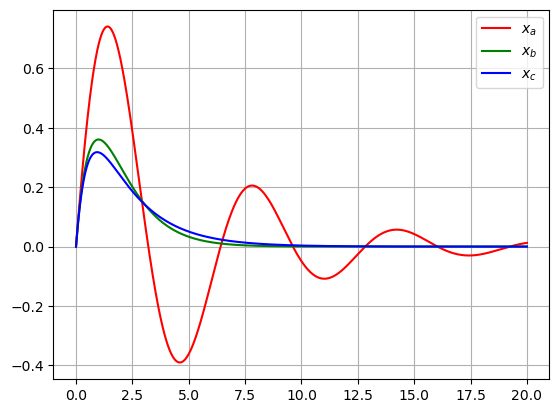

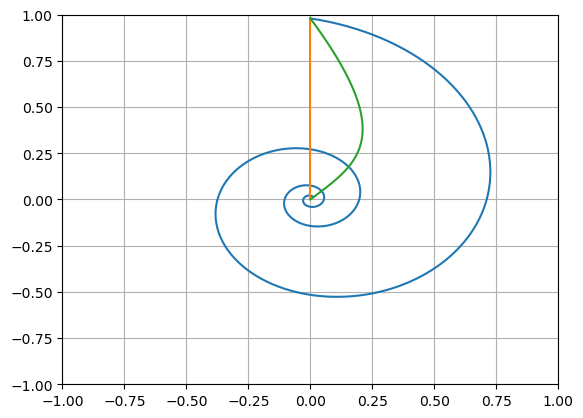

In [47]:
# ev
def f(t,y,omega0,gamma):
    """
    damping system
    """
    yn=np.zeros(np.size(y0))
    yn[0] = y[1]
    yn[1] = -2*gamma*y[1]-omega0**2*y[0]
    return yn


y0 = np.array([0,np.sqrt(0.96)])
#y0 = np.array([1,0])
t_span = (0,20)
t = np.linspace(0,20,1001)
omega0 = 1
gamma_a = 0.2
gamma_b = 1.0
gamma_c = 1.2

sol_a = mysolver.solve_ivp(f, t_span, y0, "RK4", t, (omega0, gamma_a))
sol_b = mysolver.solve_ivp(f, t_span, y0, "RK4", t, (omega0, gamma_b))
sol_c = mysolver.solve_ivp(f, t_span, y0, "RK4", t, (omega0, gamma_c))
u_a = np.sqrt(omega0**2-gamma_a**2)*sol_a[0,:]
w_a = gamma_a*sol_a[0,:]+sol_a[1,:]
u_b = np.sqrt(omega0**2-gamma_b**2)*sol_b[0,:]
w_b = gamma_b*sol_b[0,:]+sol_b[1,:]
u_c = np.sqrt(gamma_c**2-omega0**2)*sol_c[0,:]
w_c = gamma_c*sol_c[0,:]+sol_c[1,:]

''''''
plt.figure(1)
plt.plot(t, sol_a[0,:], "r-", label="$x_a$")
plt.plot(t, sol_b[0,:], "g-", label="$x_b$")
plt.plot(t, sol_c[0,:], "b-", label="$x_c$")
plt.grid()
plt.legend()


plt.figure(2)
plt.xlim(-1.0,1.0)
plt.ylim(-1.0,1.0)
plt.plot(u_a, w_a)
plt.plot(u_b, w_b)
plt.plot(u_c, w_c)
plt.grid()

